In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:
data_test=[['madhav',11],['gopi',15],['keshav'],['lalita',16]]

In [14]:
df_test=pd.DataFrame(data_test,columns=['Name','Age'])

In [15]:
df_test

,Name,Age
0,madhav,11.0
1,gopi,15.0
2,keshav,NaN
3,lalita,16.0


In [16]:
df_test.shape

(4, 2)

In [17]:
df['Amount'].astype('int')

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
df.rename(columns={'Marital_status':'Marriage'},inplace=True)
df['Amount']=df['Amount'].astype('int')
df['Amount']

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

In [20]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


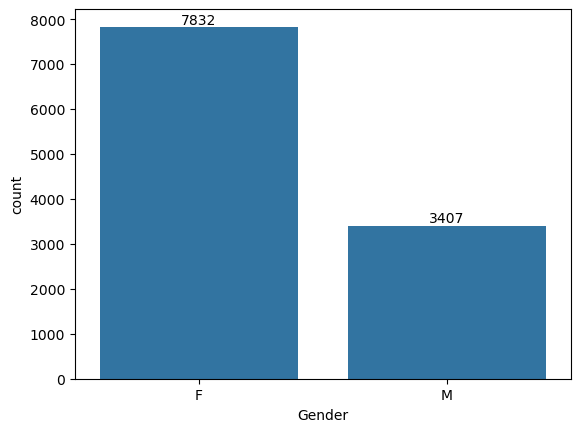

In [21]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [23]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


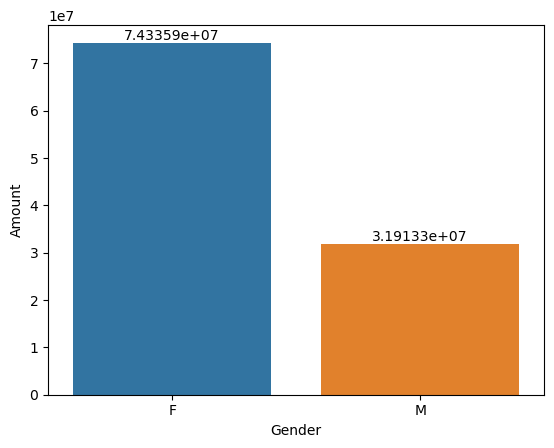

In [24]:
ax=sns.barplot(x="Gender",y="Amount",data=sales_gen,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

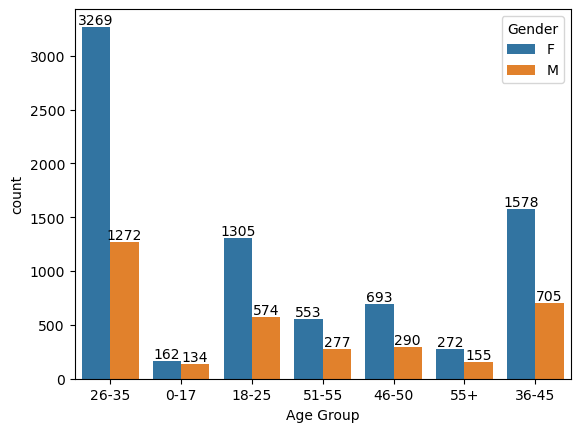

In [25]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

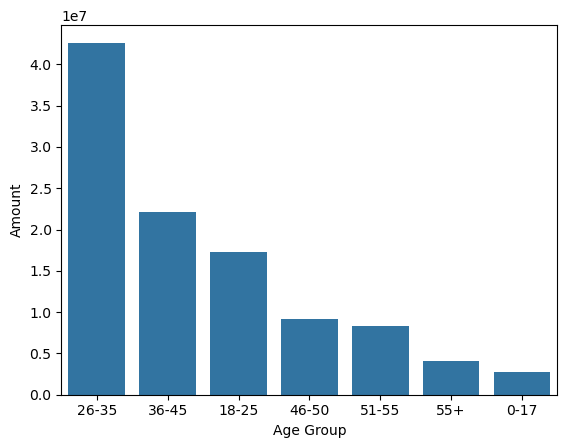

In [26]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)


In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [28]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by ='Orders',ascending=False).head(10)
                                                                            

In [29]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

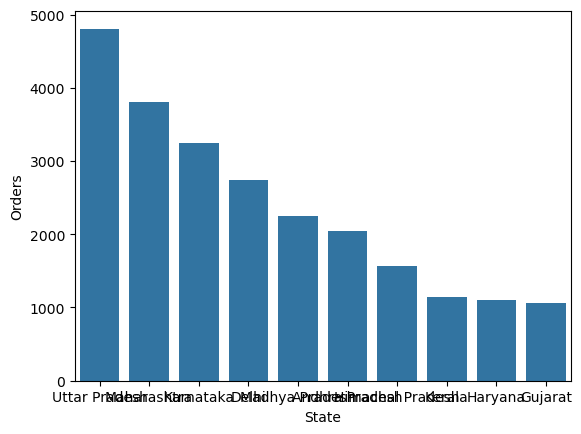

In [30]:

sns.barplot(data=sales_state,x='State',y='Orders')


In [31]:
Sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
Sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

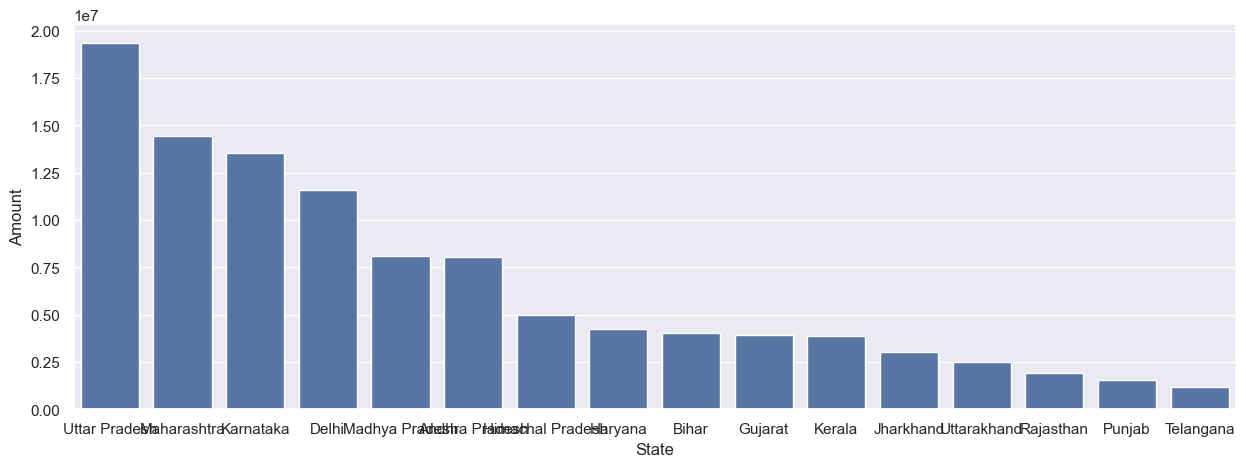

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=Sales_state,x= 'State' ,y= 'Amount')

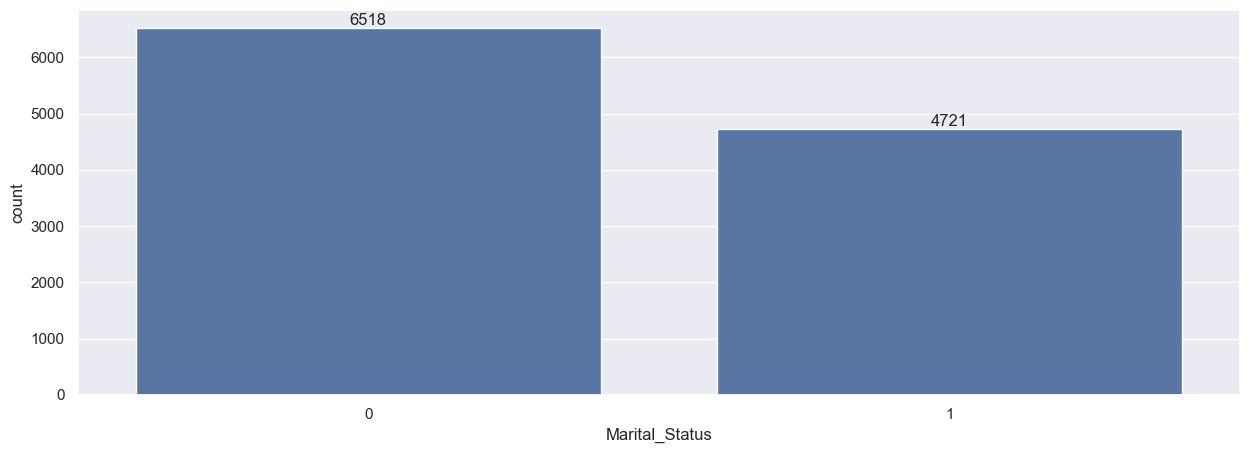

In [33]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
Sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [35]:
Sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


In [36]:
sns.set(rc={'figure.figsize':(10,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

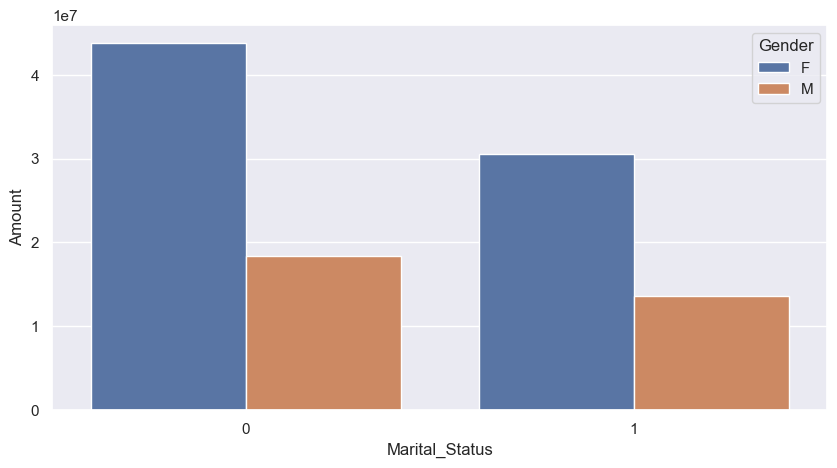

In [37]:
sns.barplot(data=Sales_state,x='Marital_Status',y='Amount',hue='Gender')

In [38]:
sns.set(rc={'figure.figsize':(15,5)})

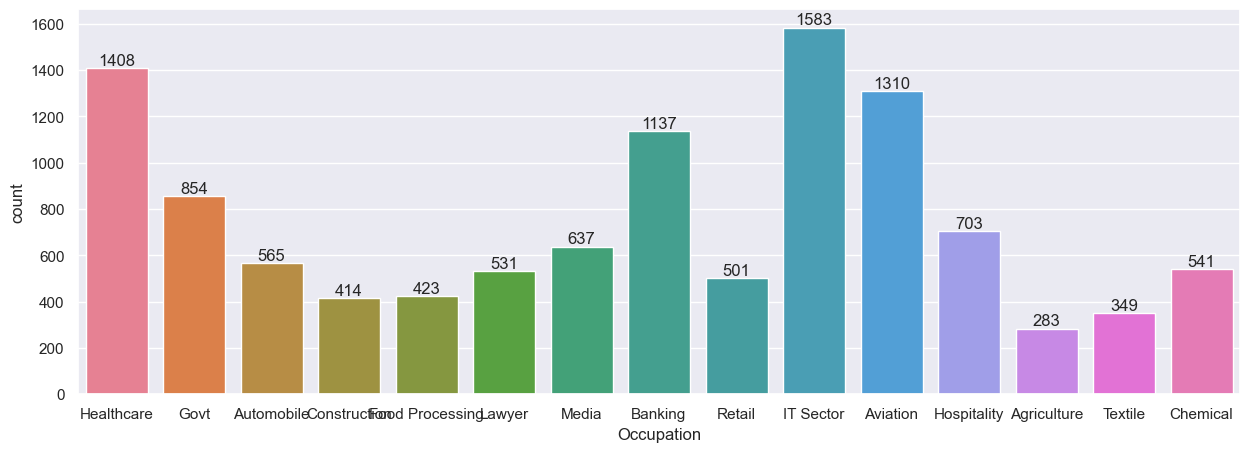

In [39]:
ax=sns.countplot(data=df,x='Occupation',hue='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

In [40]:
Sales_state=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [75]:
Sales_state

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

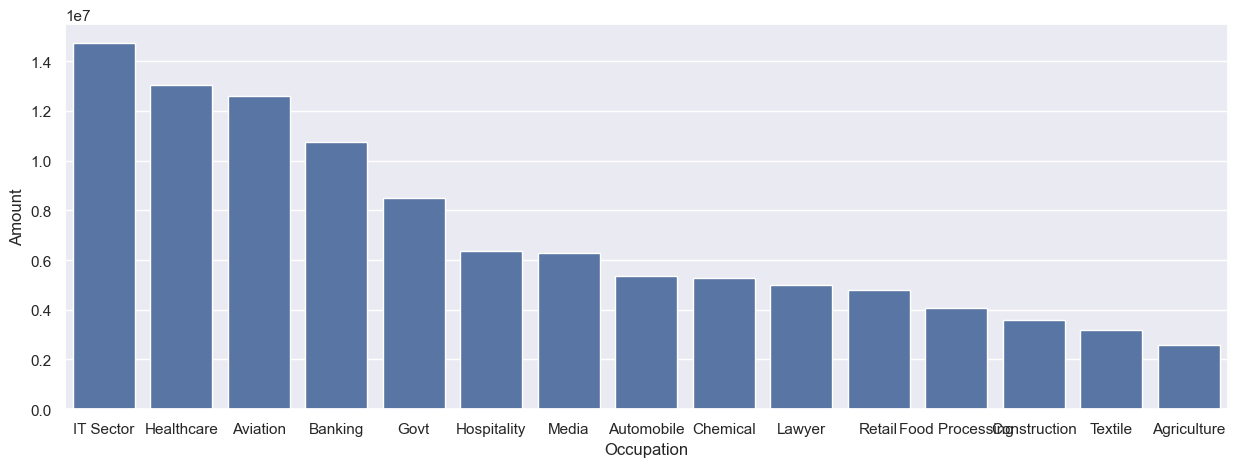

In [76]:
sns.set(rc={
sns.barplot(data=Sales_state,x='Occupation',y='Amount')